In [ ]:
import os
import pandas as pd
import numpy as np 
import tensorflow as tf 

from tensorflow import keras 

from tensorflow.keras import layers, activations, optimizers, metrics, losses
from tensorflow.keras.utils import plot_model

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.listdir()

['.config',
 'test_data.npy',
 'train_target.npy',
 'train_data.npy',
 'test_target.npy',
 'sample_data']

In [ ]:
# numpy data 불러오기
train_data = np.load("train_data.npy")
train_target = np.load("/content/train_target.npy")
test_data = np.load("/content/test_data.npy")
test_target = np.load("/content/test_target.npy")

In [ ]:
print(train_data.shape, type(train_data))

(314, 9) <class 'numpy.ndarray'>


In [ ]:
# numpy data 저장
np.save("train_data_2.npy", train_data)

In [ ]:
train_data.shape, train_target.shape, test_data.shape, test_target.shape

((314, 9), (314,), (78, 9), (78,))

In [ ]:
x = np.array([[1,2,3,4,5,6,7,8,9]]) # 공부하는 시간 matrix
y = np.array([[11],[22],[33],[44],[55],[66],[77],[87],[95]]) # 공부 시간에 매핑되는 성적

In [ ]:
x.shape, y.shape

((1, 9), (9, 1))

In [ ]:
s_scale = StandardScaler()
m_scale = MinMaxScaler()
r_scale = RobustScaler()

In [ ]:
s_scaled = s_scale.fit_transform(y)
m_scaled = m_scale.fit_transform(y)
r_scaled = r_scale.fit_transform(y)

In [ ]:
s_scale.fit(y)
s_scale.transform(y)

array([[-1.5740302 ],
       [-1.17549058],
       [-0.77695097],
       [-0.37841135],
       [ 0.02012826],
       [ 0.41866788],
       [ 0.81720749],
       [ 1.17951623],
       [ 1.46936323]])

In [ ]:
m_scaled

array([[0.        ],
       [0.13095238],
       [0.26190476],
       [0.39285714],
       [0.52380952],
       [0.6547619 ],
       [0.78571429],
       [0.9047619 ],
       [1.        ]])

In [ ]:
# one-hot
df = pd.DataFrame()

In [ ]:
df["국가"] =  ["한국", "일본", "중국", "미국", "영국"]

In [ ]:
df

,국가
0,한국
1,일본
2,중국
3,미국
4,영국


In [ ]:
one_hot_df = pd.get_dummies(df, columns=["국가"])
one_hot_df

,국가_미국,국가_영국,국가_일본,국가_중국,국가_한국
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,1,0,0,0


In [ ]:
one_hot_df.values

array([[0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)

In [ ]:
one_hot = OneHotEncoder()
one_hot_obj = one_hot.fit_transform(df["국가"].values.reshape(-1,1))
one_hot_arr = one_hot_obj.toarray()
one_hot_arr

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
df["국가"].shape

(5,)

In [ ]:
df["국가"].values.reshape(1,-1).shape # -1은 전체를 나타내는 의미

(1, 5)

In [ ]:
df["국가"].values.reshape(1,5).shape

(1, 5)

In [ ]:
one_hot = OneHotEncoder()
one_hot_obj = one_hot.fit_transform(df[["국가"]])
one_hot_arr = one_hot_obj.toarray()
one_hot_arr

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
df[["국가"]].shape

(5, 1)

In [ ]:
nogada_df = df.copy()
nogada_df['한국'] = nogada_df["국가"].apply(lambda x : 1 if x =="한국" else 0)
# nogaga_df['한국'] = nogada_df["국가"].apply(lambda x : 1 if x =="한국" else 0)
# nogaga_df['한국'] = nogada_df["국가"].apply(lambda x : 1 if x =="한국" else 0)
# nogaga_df['한국'] = nogada_df["국가"].apply(lambda x : 1 if x =="한국" else 0)
# nogaga_df['한국'] = nogada_df["국가"].apply(lambda x : 1 if x =="한국" else 0)

In [ ]:
nogada_df

,국가,한국
0,한국,1
1,일본,0
2,중국,0
3,미국,0
4,영국,0


In [ ]:
# label encoding
label = LabelEncoder()
label_arr = label.fit_transform(df["국가"])
label_arr

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4, 2, 3, 0, 1])

In [ ]:
label_arr.shape

(5,)

In [ ]:
df["국가"].map({"한국": 0, "일본":1 ,"중국": 2, "미국":3, "영국":4})

0    0
1    1
2    2
3    3
4    4
Name: 국가, dtype: int64

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
# sigmoid, relu, elu,
activations.relu(x=[-1.0])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>

In [ ]:
activations.elu(x=[-1.0])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.63212055], dtype=float32)>

In [ ]:
relu = layers.Activation("relu")
elu = layers.Activation("elu")
gelu = layers.Activation("gelu")
sigmoid = layers.Activation("sigmoid")
softmax = layers.Activation("softmax")

In [ ]:
# Optimizer
sgd = optimizers.SGD()
adagrad = optimizers.Adagrad()
adadelta = optimizers.Adadelta()
rmsprop = optimizers.RMSprop()
adam = optimizers.Adam()

In [ ]:
# losses
bce = losses.BinaryCrossentropy() # 이진분류 ,  y -> label encoding , 0,1
sce = losses.SparseCategoricalCrossentropy() # 다중분류, y -> label encoding , 0,1,2,3,4 vector
cce = losses.CategoricalCrossentropy() # 다중분류 y -> one-hot encoding 

In [ ]:
mse = losses.MeanSquaredError()
mae = losses.MeanAbsoluteError()

In [ ]:
# metric
bce_ = metrics.BinaryCrossentropy()
cce_ = metrics.CategoricalCrossentropy()
rmse = metrics.RootMeanSquaredError()
precision = metrics.Precision()

In [ ]:
# Sequential
# Functional
# Subclass

In [ ]:
train_data.shape

(314, 9)

In [ ]:
(3,)

(3,)

In [ ]:
relu

In [ ]:
# Sequential
sequential_model = keras.Sequential([
    layers.Dense(64, kernel_initializer="he_normal", input_shape=(train_data.shape[1],), activation="relu"),
    layers.Dense(64, kernel_initializer="he_normal", activation=relu),
    layers.Dense(32, kernel_initializer="he_normal", activation="relu"),
    layers.Dense(1)
])

In [ ]:
sequential_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 6,913
Trainable params: 6,913
Non-trainable params: 0
_________________________________________________________________


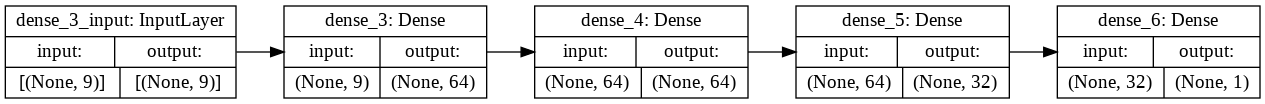

In [ ]:
plot_model(sequential_model, show_shapes=True, rankdir="LR")

In [ ]:
# functional
input_ = layers.Input(shape=(train_data.shape[1], ))
x = layers.Dense(64, kernel_initializer="he_normal", activation="relu")(input_)
x = layers.Dense(64, kernel_initializer="he_normal", activation="relu")(x)
x = layers.Dense(32, kernel_initializer="he_normal", activation="relu")(x)
output = layers.Dense(1)(x) 

In [ ]:
# keras.Model에 넣어주기
functional_model = keras.Model(input_, output)

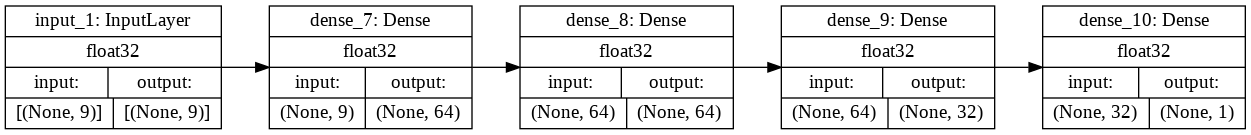

In [ ]:
plot_model(functional_model, show_shapes=True, show_dtype=True, rankdir="LR")

In [ ]:
functional_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 6,913
Trainable params: 6,913
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# sequential하지 않은 구조의 모델 만들기
input_ = keras.layers.Input(shape=(train_data.shape[1],))
x_1 = keras.layers.Dense(32, activation="relu")(input_)
x_2 = keras.layers.Dense(32, activation="relu")(x_1)
concat = keras.layers.Concatenate()([input_, x_2])
output = keras.layers.Dense(1)(concat)
functional_model_2 = keras.Model(input_, output)

In [ ]:
functional_model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 9)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 32)           320         input_2[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 32)           1056        dense_11[0][0]                   
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 41)           0           input_2[0][0]                    
                                                                 dense_12[0][0]             

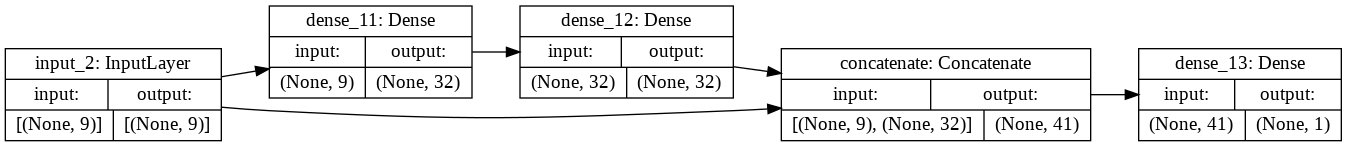

In [ ]:
plot_model(functional_model_2, show_shapes=True, rankdir="LR")

In [ ]:
# subclassing
class SubclassingModel(keras.Model):
    def __init__(self, units=32, activation="relu"):
        super().__init__()
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.output_ = keras.layers.Dense(1) # output변수명 사용 불가 -> output_

    # input Layer가 필요없음
    def call(self, inputs):
        hidden1 = self.hidden1(inputs)
        hidden2 = self.hidden2(hidden1)
        output = self.output_(hidden2)
        return output    

In [ ]:
subclass_model = SubclassingModel(units=64, activation="elu")

In [ ]:
subclass_model.compile(
    optimizer = optimizers.Adam(learning_rate=0.002), 
    loss = losses.MeanSquaredError(),
    metrics = [ metrics.RootMeanSquaredError(), metrics.MeanAbsoluteError()]
)

In [ ]:
subclass_model.fit(train_data, train_target, epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
2/2 [==============================] - 1s 164ms/step - loss: 592.2926 - root_mean_squared_error: 24.3371 - mean_absolute_error: 23.2023 - val_loss: 609.0109 - val_root_mean_squared_error: 24.6781 - val_mean_absolute_error: 23.6360
Epoch 2/50
2/2 [==============================] - 0s 19ms/step - loss: 579.0772 - root_mean_squared_error: 24.0640 - mean_absolute_error: 23.0362 - val_loss: 594.2610 - val_root_mean_squared_error: 24.3775 - val_mean_absolute_error: 23.4347
Epoch 3/50
2/2 [==============================] - 0s 19ms/step - loss: 566.5195 - root_mean_squared_error: 23.8017 - mean_absolute_error: 22.8705 - val_loss: 579.3073 - val_root_mean_squared_error: 24.0688 - val_mean_absolute_error: 23.2216
Epoch 4/50
2/2 [==============================] - 0s 19ms/step - loss: 554.0989 - root_mean_squared_error: 23.5393 - mean_absolute_error: 22.6992 - val_loss: 563.8412 - val_root_mean_squared_error: 23.7453 - val_mean_absolute_error: 22.9908
Epoch 5/50
2/2 [===================

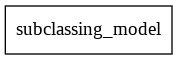

In [ ]:
# subclass는 plot_model 안됨
plot_model(subclass_model, rankdir="LR")

In [ ]:
subclass_model.summary()

Model: "subclassing_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             multiple                  640       
_________________________________________________________________
dense_15 (Dense)             multiple                  4160      
_________________________________________________________________
dense_16 (Dense)             multiple                  65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
subclass_model_2 = SubclassingModel(units=64, activation="elu")

In [ ]:
# build가 안되어서 summary불가
subclass_model_2.summary()

ValueError: ignored